# OpenCV Basics:
Based on [Nicholas Renotte's Tutorial](https://www.youtube.com/watch?v=M6jukmppMqU&list=PLgNJO2hghbmg0-6EbYR3MJkHJcneXEmwx&pp=iAQB) 

## Setting up OpenCV

In [1]:
!pip install opencv-python


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import cv2

## Test Histogram Samples

Keymap :  
a - show histogram for color image in curve mode   
b - show histogram in bin mode   
c - show equalized histogram (always in bin mode)   
d - show histogram for gray image in curve mode   
e - show histogram for a normalized image in curve mode   
Esc - exit   

In [3]:
!cd opencv-4.8.0/samples/python & python hist.py

 This is a sample for histogram plotting for RGB images and grayscale images for better understanding of colour distribution

Benefit : Learn how to draw histogram of images
          Get familier with cv.calcHist, cv.equalizeHist,cv.normalize and some drawing functions

Level : Beginner or Intermediate

Functions : 1) hist_curve : returns histogram of an image drawn as curves
            2) hist_lines : return histogram of an image drawn as bins ( only for grayscale images )

Usage : python hist.py <image_file>

Abid Rahman 3/14/12 debug Gary Bradski

usage : python hist.py <image_file>
 Histogram plotting 

    Keymap :

    a - show histogram for color image in curve mode 

    b - show histogram in bin mode 

    c - show equalized histogram (always in bin mode) 

    d - show histogram for gray image in curve mode 

    e - show histogram for a normalized image in curve mode 

    Esc - exit 

    
a
b
hist_lines applicable only for grayscale images
c
d
a
a
b
hist_lines applicable

[ WARN:0@0.121] global D:\a\opencv-python\opencv-python\opencv\modules\core\src\utils\samples.cpp (61) cv::samples::findFile cv::samples::findFile('lena.jpg') => 'd:\Programming\Code\Python\OpenCV Basics\opencv-4.8.0\samples\python/../..\samples/data\lena.jpg'


## Test Optical flow Samples

Keys:  
 1   - toggle HSV flow visualization   
 2   - toggle glitch  
 ESC - exit   

In [6]:
!cd opencv-4.8.0/samples/python & python opt_flow.py 1

[ WARN:0@18.217] global D:\a\opencv-python\opencv-python\opencv\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback



example to show optical flow

USAGE: opt_flow.py [<video_source>]

Keys:
 1 - toggle HSV flow visualization
 2 - toggle glitch

Keys:
    ESC    - exit

HSV flow visualization is on
glitch is on
Done


## Importing Dependencies

In [2]:
import os
from matplotlib import pyplot as plt

## Reading Images

In [17]:
img_path = os.path.join('Input', 'Flare.jpg')
img_path

'Input\\Flare.jpg'

In [18]:
img = cv2.imread(img_path)
height, width, channels = img.shape

img.shape gives the resolution (height x width) with the number of channels like RGB

## Render Image

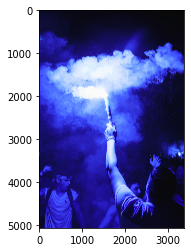

In [19]:
plt.imshow(img)
# OpenCV reads the image as BGR whereas matplotlib reads it as RGB

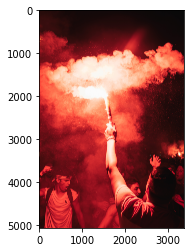

In [22]:
# Correction
recolor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(recolor)
plt.show()

## Writing an Image

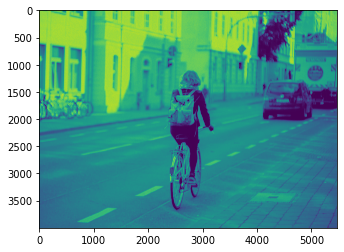

In [23]:
img_path = os.path.join('Input', 'Bike.jpg')
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [24]:
cv2.imwrite('Output/grayimage.jpg', gray)

True

## Video   
## Setting up a Captures

In [4]:
cap = cv2.VideoCapture(os.path.join('Input', 'Video1.mp4'))

In [26]:
# Print a frame
ret, frame = cap.read()
# ret is the return value that tells whether the frame exists

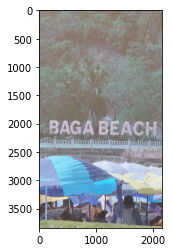

In [30]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()

In [31]:
# Release Capture to unlink python from the video
cap.release()
cap.read()

(False, None)

## Capture Properties

In [33]:
# Height
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

3840.0

In [34]:
# Width
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

2160.0

In [35]:
# Number of Frames
cap.get(cv2.CAP_PROP_FRAME_COUNT)

208.0

In [36]:
# FPS
cap.get(cv2.CAP_PROP_FPS)

# FrameCount/FPS = Duration

59.9853881746754

## Working with Video Captures

In [23]:
cap = cv2.VideoCapture(os.path.join('Input', 'Video1.mp4'))

for frame_index in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):

    ret, frame = cap.read()
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Gray Transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Video Player', gray)

    # Render
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Close everything
cap.release()
cv2.destroyAllWindows()

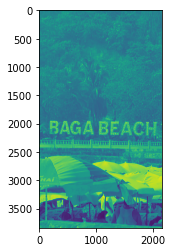

In [24]:
plt.imshow(gray)

## Exporting Video

In [33]:
cap = cv2.VideoCapture(os.path.join('Input', 'Video1.mp4'))

# Setting up video writer
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = int(cap.get(cv2.CAP_PROP_FPS))

video_writer = cv2.VideoWriter(os.path.join('Output', 'Result.avi'), cv2.VideoWriter_fourcc('P', 'I', 'M', '1'), fps, (width, height), isColor = False)
# fourcc is used to implement a given codec (PIM1 in this case). More codecs can be found at fourcc.org/codecs
# isColor is used to tell the function that the image is grayscale

for frame_index in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):

    ret, frame = cap.read()
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Gray Transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Write the Video
    #cv2.imshow('Video Player', gray)
    video_writer.write(gray)

    # Render
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Close everything
cap.release()
cv2.destroyAllWindows()
video_writer.release()

## USB/Webcam
## Connecting USB Device

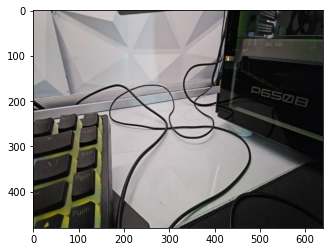

In [16]:
cap = cv2.VideoCapture(1)
ret, frame = cap.read()
plt.imshow(frame)
cap.release()

In [18]:
def take_photo():
    cap = cv2.VideoCapture(1)
    ret, frame = cap.read()
    cv2.imwrite('Output/WebcamPhoto.jpg', frame)
    cap.release()

In [22]:
take_photo()

## Rendering in Real Time

In [24]:
cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()

    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Edge Detection
## Import Dependencies

In [2]:
import cv2
import os
from matplotlib import pyplot as plt

## Load Image

In [67]:
img_path = os.path.join('Input', 'WebcamPhoto.jpg')
img = cv2.imread(img_path)
# plt.imshow(img)
# plt.show()
# View image using OpenCV
# resized_img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('Frame View', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Edge Detection

We pass 2 threshold values to the code that are used to calculate the gradient that justifies which pixels are a part of an edge.  
More details can be found in [this](https://docs.opencv.org/3.4/d7/de1/tutorial_js_canny.html) documentation.

In [95]:
# Apply Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# Apply Canny
canny = cv2.Canny(blur, threshold1 = 10, threshold2 = 50)

In [96]:
# View image using OpenCV
# resized_img = cv2.resize(canny, (int(img.shape[1]/8), int(img.shape[0]/8)))
cv2.imshow('Frame View', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Export Results

In [97]:
cv2.imwrite('Output/Edges.jpg', canny)

True